In [ ]:
#Francesco Pellegrin
#Classificazione sulle sequenze di consumo 

#Risultati finali
#Modello 2 -> loss: 0.0596 - accuracy: 0.9845
#Modello 1 -> loss: 0.0623 - accuracy: 0.9829


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.models import Model
from keras.models import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras import initializers, optimizers, regularizers
%matplotlib inline

Using TensorFlow backend.


In [2]:
dfs = pd.read_excel('dati_passo_5minuti.xlsx', sheet_name=None)
labels = pd.read_excel('labels.xlsx', sheet_name=None)

In [3]:
for label in labels:    
    labels[label].replace({np.nan: 4}, inplace=True)
for dt in dfs:    
    dfs[dt].replace({np.nan: 0}, inplace=True)


In [4]:
def dropColumn(dic):
    for dt in dic: # itero su ogni foglio
        dic[dt] = dic[dt].drop(['utenze'], axis=1) # rimuovo la colonna utenze
    return dic 

def dailyData(dt, lab): # converto i dati mensili in giornalieri
    data = [] # array data 
    label = [] # array label 
    for sht in dt: # itero per ogni foglio
        for i, row in dt[sht].iterrows(): # itero sulla singola riga 
            for k,j in enumerate(range(0,len(dt[sht].columns), 288)): # eseguo un loop sui dati per ottenere 288 colonne
                data.append(row.iloc[j:j+288].tolist()) # eseguo un append delle 288 colonne
                label.append(lab[sht].iloc[i,k]) # prendo la label corrispondente ed eseguo un append
    return data, label # ritorno i dati

In [5]:
#extra: eseguo una differenza fra i dati per rilevare la perdita totale

def compDiff(dt): 
    final = []
    for row in dt: # itero su ogni riga (giornalmente) dato che corrisponde ad un giorno
        temp = []
        vv = row[0] # prendo il primo valore
        for val in row:
            temp.append(val - vv) # calcolo la differenza cin il valore corrente rispetto al precedente
            vv = val # imposta il valore corrente come valore precedente
        final.append(temp)
    return final # ritorno l'array aggiornato

In [6]:
#elimino la prima colonna (utenze)
dfs = dropColumn(dfs)
labels = dropColumn(labels)

In [7]:
#organizzo i dati in giornalieri
data, label = dailyData(dfs, labels)

In [8]:
# calcolo la differenza per valutare la perdita totale
data = compDiff(data)

In [9]:
data = np.array(data)
label = np.array(label)
label_cat = to_categorical(label, num_classes = 5)

# splitto i dati in train e test
x_train, x_test, y_train, y_test = train_test_split(data, label_cat, test_size=0.2, random_state=42)


In [10]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [11]:
#PRIMO MODELLO

model = Sequential()

model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(288,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5 , activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 286, 128)          512       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 284, 64)           24640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 284, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 142, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9088)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              9307136   
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [15]:

history_1=model.fit(x_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          shuffle=True,
          validation_data=(x_test, y_test))

Train on 15529 samples, validate on 3883 samples
Epoch 1/100
15529/15529 [==============================] - 46s 3ms/step - loss: 0.7216 - accuracy: 0.7816 - val_loss: 0.7505 - val_accuracy: 0.7767
Epoch 2/100
15529/15529 [==============================] - 43s 3ms/step - loss: 0.6445 - accuracy: 0.7981 - val_loss: 0.8297 - val_accuracy: 0.7989
Epoch 3/100
15529/15529 [==============================] - 45s 3ms/step - loss: 0.6518 - accuracy: 0.8067 - val_loss: 0.5673 - val_accuracy: 0.8622
Epoch 4/100
15529/15529 [==============================] - 46s 3ms/step - loss: 0.5765 - accuracy: 0.8287 - val_loss: 0.6033 - val_accuracy: 0.8527
Epoch 5/100
15529/15529 [==============================] - 47s 3ms/step - loss: 0.5706 - accuracy: 0.8371 - val_loss: 0.5624 - val_accuracy: 0.8674
Epoch 6/100
15529/15529 [==============================] - 47s 3ms/step - loss: 0.6828 - accuracy: 0.7905 - val_loss: 0.6766 - val_accuracy: 0.8032
Epoch 7/100
15529/15529 [==============================] - 44s 

Epoch 56/100
15529/15529 [==============================] - 47s 3ms/step - loss: 0.0799 - accuracy: 0.9767 - val_loss: 0.7419 - val_accuracy: 0.7505
Epoch 57/100
15529/15529 [==============================] - 48s 3ms/step - loss: 0.0750 - accuracy: 0.9783 - val_loss: 0.5006 - val_accuracy: 0.8947
Epoch 58/100
15529/15529 [==============================] - 46s 3ms/step - loss: 0.0645 - accuracy: 0.9818 - val_loss: 0.6869 - val_accuracy: 0.8470
Epoch 59/100
15529/15529 [==============================] - 45s 3ms/step - loss: 0.0699 - accuracy: 0.9797 - val_loss: 0.5537 - val_accuracy: 0.8723
Epoch 60/100
15529/15529 [==============================] - 60s 4ms/step - loss: 0.3209 - accuracy: 0.9164 - val_loss: 0.9620 - val_accuracy: 0.7955
Epoch 61/100
15529/15529 [==============================] - 60s 4ms/step - loss: 0.2737 - accuracy: 0.9147 - val_loss: 0.5817 - val_accuracy: 0.8736
Epoch 62/100
15529/15529 [==============================] - 52s 3ms/step - loss: 0.0712 - accuracy: 0.9793

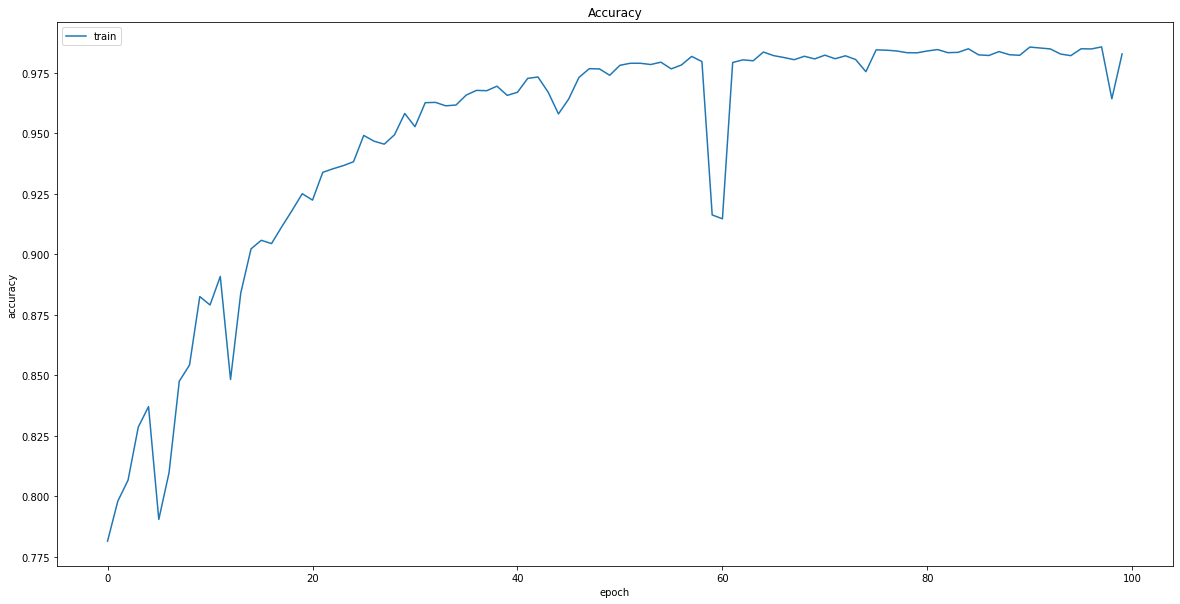

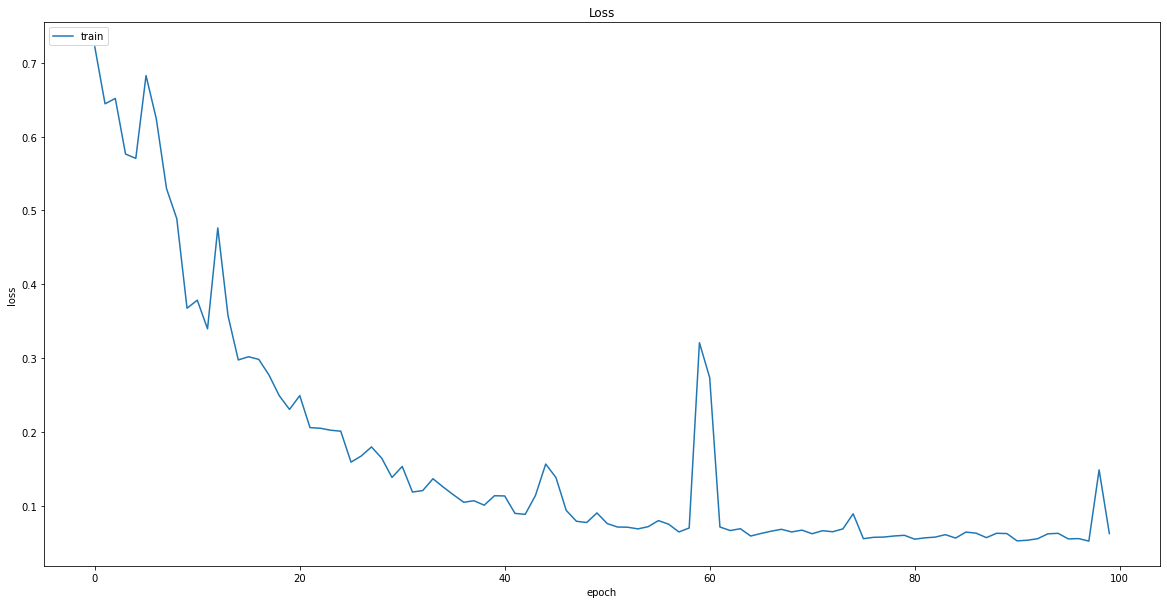

In [20]:
# ACCURACY
plt.figure(figsize=(20,10))
plt.plot(history_1.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# LOSS
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
#SECONDO MODELLO (migliore)

model_2 = Sequential()
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(288,1)))
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(5, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 286, 64)           256       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 284, 64)           12352     
_________________________________________________________________
dropout_2 (Dropout)          (None, 284, 64)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 142, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9088)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               908900    
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [21]:
history_2=model_2.fit(x_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          shuffle=True,
          validation_data=(x_test, y_test))

Train on 15529 samples, validate on 3883 samples
Epoch 1/100
15529/15529 [==============================] - 12s 773us/step - loss: 0.2390 - accuracy: 0.9188 - val_loss: 0.3774 - val_accuracy: 0.8707
Epoch 2/100
15529/15529 [==============================] - 12s 747us/step - loss: 0.2291 - accuracy: 0.9244 - val_loss: 0.3083 - val_accuracy: 0.9024
Epoch 3/100
15529/15529 [==============================] - 12s 748us/step - loss: 0.2377 - accuracy: 0.9234 - val_loss: 0.3189 - val_accuracy: 0.8880
Epoch 4/100
15529/15529 [==============================] - 11s 738us/step - loss: 0.2113 - accuracy: 0.9315 - val_loss: 0.3250 - val_accuracy: 0.8893
Epoch 5/100
15529/15529 [==============================] - 12s 745us/step - loss: 0.2049 - accuracy: 0.9322 - val_loss: 0.3320 - val_accuracy: 0.9001
Epoch 6/100
15529/15529 [==============================] - 12s 755us/step - loss: 0.2137 - accuracy: 0.9290 - val_loss: 0.3216 - val_accuracy: 0.8921
Epoch 7/100
15529/15529 [==========================

Epoch 55/100
15529/15529 [==============================] - 12s 745us/step - loss: 0.1373 - accuracy: 0.9586 - val_loss: 0.4423 - val_accuracy: 0.8890
Epoch 56/100
15529/15529 [==============================] - 12s 774us/step - loss: 0.0951 - accuracy: 0.9731 - val_loss: 0.4244 - val_accuracy: 0.8929
Epoch 57/100
15529/15529 [==============================] - 12s 757us/step - loss: 0.0937 - accuracy: 0.9722 - val_loss: 0.4371 - val_accuracy: 0.8931
Epoch 58/100
15529/15529 [==============================] - 12s 755us/step - loss: 0.0952 - accuracy: 0.9740 - val_loss: 0.4389 - val_accuracy: 0.8900
Epoch 59/100
15529/15529 [==============================] - 12s 770us/step - loss: 0.0945 - accuracy: 0.9723 - val_loss: 0.4912 - val_accuracy: 0.8684
Epoch 60/100
15529/15529 [==============================] - 13s 842us/step - loss: 0.0905 - accuracy: 0.9731 - val_loss: 0.4392 - val_accuracy: 0.8903
Epoch 61/100
15529/15529 [==============================] - 11s 689us/step - loss: 0.1740 - ac

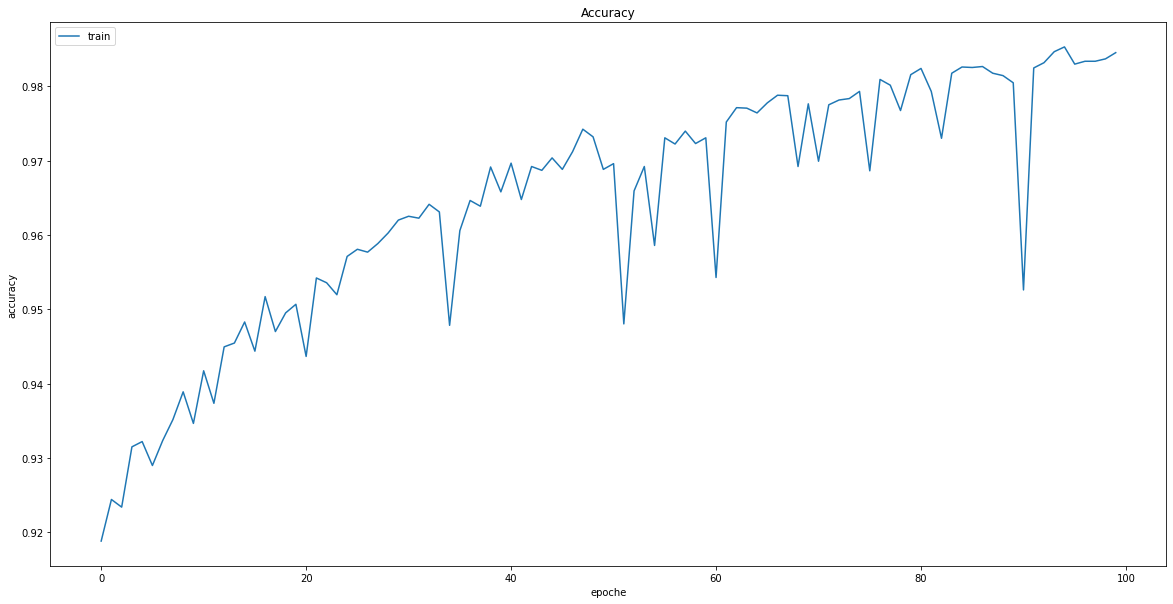

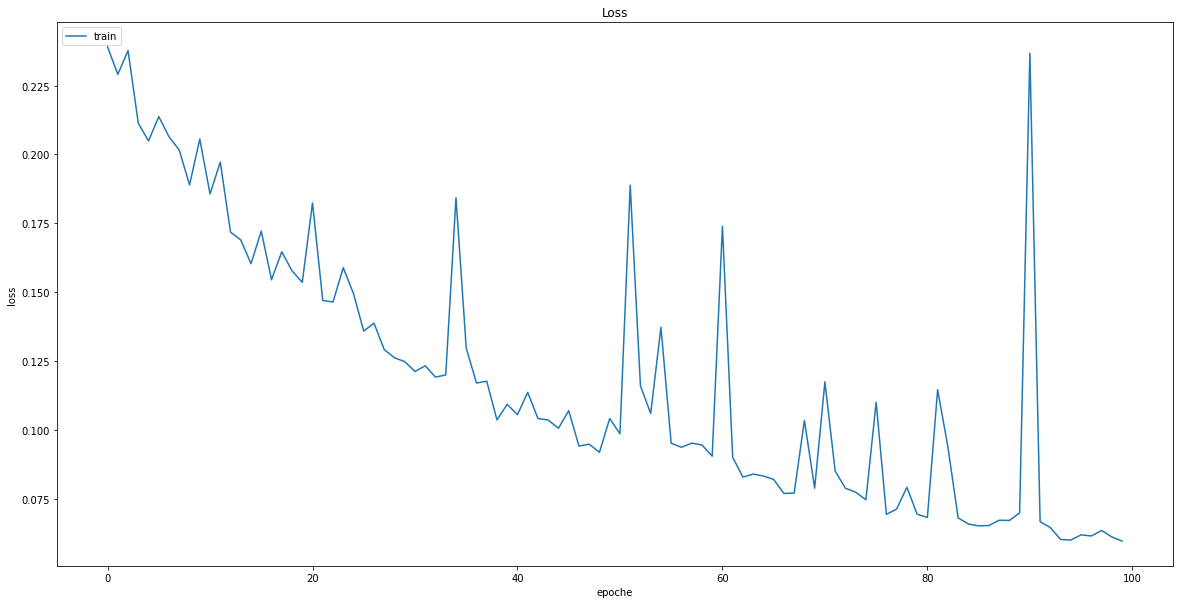

In [22]:
# ACCURACY
plt.figure(figsize=(20,10))
plt.plot(history_2.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoche')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# LOSS
plt.figure(figsize=(20,10))
plt.plot(history_2.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoche')
plt.legend(['train', 'test'], loc='upper left')
plt.show()